In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
df= pd.read_csv(r"C:/Spring2022/ML Class/datasets/pd_speech_features.csv")

df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [3]:
df.shape

(756, 755)

In [4]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

# Question 2 - a

In [5]:
# Performing Scaling

In [6]:
scaler = StandardScaler()

In [7]:
X = df.drop('class',axis=1).values
y = df['class'].values

X_Scale = scaler.fit_transform(X)

# Question 2 - b

In [8]:
# Applying PCA when k = 3 or n_components=3

In [9]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,class
0,-10.047372,1.471074,-6.846407,1
1,-10.637726,1.583752,-6.830971,1
2,-13.516185,-1.253546,-6.818703,1
3,-9.155085,8.833606,15.290913,1
4,-6.764470,4.611470,15.637126,1


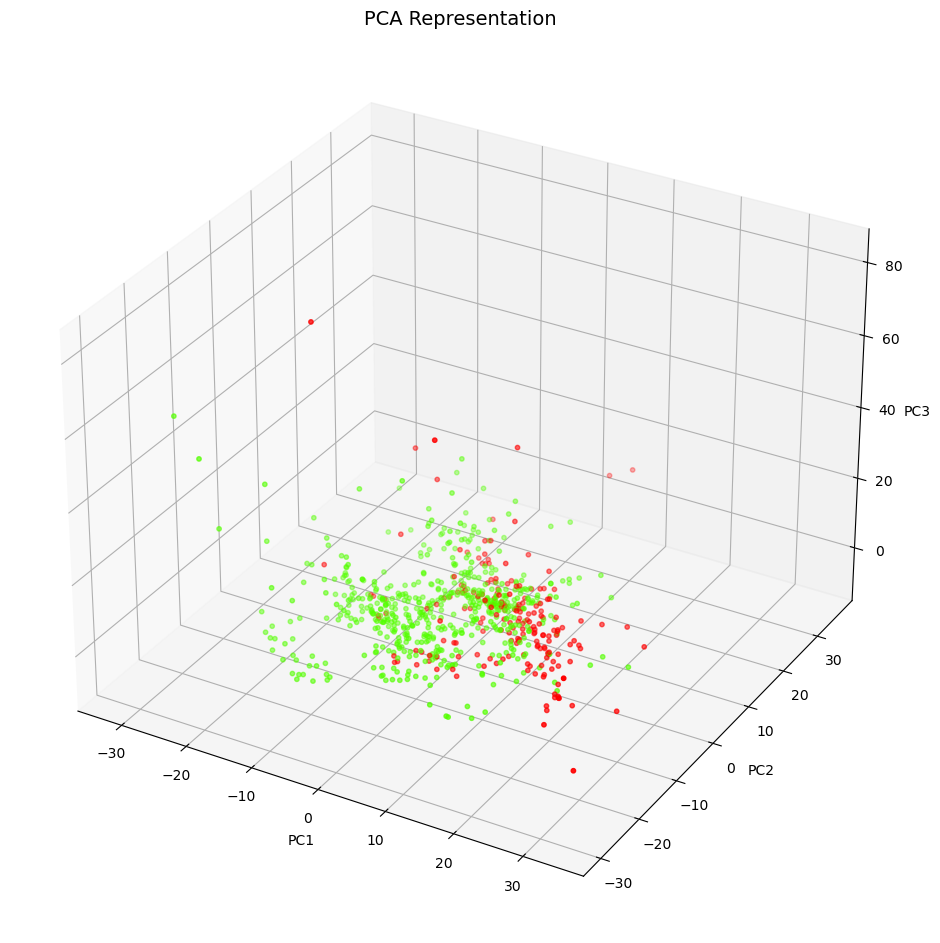

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')

axes.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c=finalDf['class'], cmap = 'prism', s=10)

# Question 2 - c

In [12]:
# Applying SVM to report performance

In [13]:
X = df.drop('class',axis=1).values
y = df['class'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [17]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_train)

# Summary of the predictions made by the classifier
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy for our training dataset with PCA is ',accuracy_score(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       135
           1       0.74      1.00      0.85       394

    accuracy                           0.74       529
   macro avg       0.37      0.50      0.43       529
weighted avg       0.55      0.74      0.64       529

[[  0 135]
 [  0 394]]
accuracy for our training dataset with PCA is  0.7448015122873346


In [18]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy for our test dataset with PCA is',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.75      1.00      0.86       170

    accuracy                           0.75       227
   macro avg       0.37      0.50      0.43       227
weighted avg       0.56      0.75      0.64       227

[[  0  57]
 [  0 170]]
accuracy for our test dataset with PCA is 0.748898678414097


# SVM Performance without scaling for Training set and Test Set is 0.7448015122873346 and 0.748898678414097


In [19]:
scaler = StandardScaler()

In [20]:
# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()

classifier.fit(X_train_scaled, y_train)


y_pred = classifier.predict(X_train_scaled)

# Summary of the predictions made by the classifier
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy for our training dataset with PCA is ',accuracy_score(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       394

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529

[[135   0]
 [  0 394]]
accuracy for our training dataset with PCA is  1.0


In [22]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test_scaled)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy for our test dataset with PCA is',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.61      0.37        57
           1       0.77      0.44      0.56       170

    accuracy                           0.48       227
   macro avg       0.52      0.52      0.46       227
weighted avg       0.64      0.48      0.51       227

[[35 22]
 [96 74]]
accuracy for our test dataset with PCA is 0.4801762114537445


# SVM Performance with scaling for Training set and Test Set is 1.0 and 0.4801762114537445